# Decision rules

In [4]:
from behavioural_modelling.decision_rules import softmax, softmax_subtract_max, softmax_difference
import matplotlib.pyplot as plt
import numpy as np

## Softmax function

### Create test values

The decision rule functions (e.g., `softmax()`) expect a 2D array of values, where the 1st dimension corresponds to the trial and the second dimension corresponds to the options.

So, for example if we had 10 trials and 3 options, we would have a 2D array with shape `(10, 3)`.

Here we create some random values in the range `[-1, 1]` to use as our test values.

In [5]:
# Create test values, 5 trials, 3 options with random values ranging from -1 to 1
rng = np.random.default_rng(12345)
test_values = rng.uniform(-1, 1, size=(5, 3))
print(test_values)

[[-0.54532796 -0.36648332  0.59473091]
 [ 0.35250934 -0.2177809  -0.33437214]
 [ 0.19661751 -0.62653163  0.34551209]
 [ 0.88360573 -0.50350857  0.8977623 ]
 [ 0.33447491 -0.80820413 -0.11632067]]


And we can plot these as a heatmap to see the values visually.

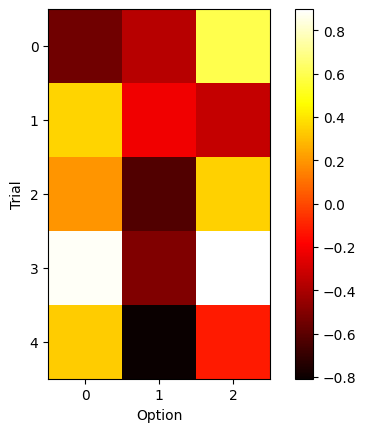

In [8]:
## Plot as a heatmap
plt.imshow(test_values, cmap="hot", interpolation="nearest")
plt.xlabel("Option")
plt.ylabel("Trial")
plt.colorbar()

### Use the softmax function

We then apply the softmax function to transform these values into action probabilities.

In [10]:
# Apply softmax to get choice probabilities
choice_probabilities = softmax(test_values)
print(choice_probabilities)

[[0.1878715  0.22466329 0.5874652 ]
 [0.48344117 0.27331895 0.2432399 ]
 [0.38467494 0.16889033 0.44643474]
 [0.44168591 0.11033098 0.44798315]
 [0.5112254  0.16306217 0.32571244]]


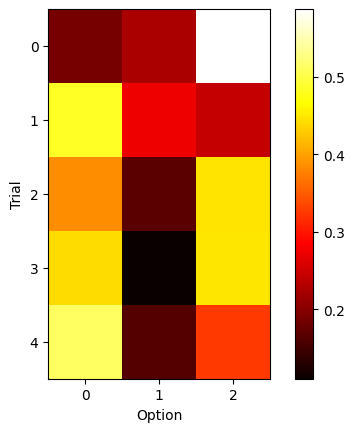

In [13]:
# Plot as a heatmap
plt.imshow(choice_probabilities, cmap="hot", interpolation="nearest")
plt.xlabel("Option")
plt.ylabel("Trial")
plt.colorbar()

### Plot the relationship between value and probability

To demonstrate the relationship between value and probability, we can plot the softmax function for a range of values.

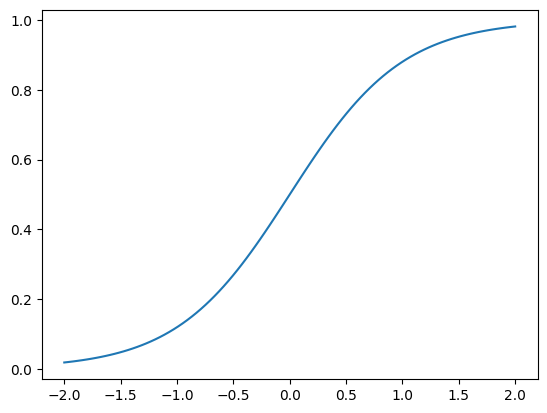

In [31]:
# Generate a range of values from -1 to 1 for a single trial
test_values = np.linspace(-2, 2, 100)[:, None]

# Add 1-value as a second option
test_values = np.hstack((test_values, (2 - (1 + test_values)) - 1))

# Apply softmax to get choice probabilities
choice_probabilities = softmax(test_values)

# Plot function
plt.plot(test_values[:, 0], choice_probabilities[:, 0])

### Demonstrate the effect of temperature

We can also demonstrate the effect of temperature on the softmax function. The temperature parameter controls the steepness of the softmax function. Higher temperatures result in a flatter softmax function, which means that the action probabilities are closer to each other.

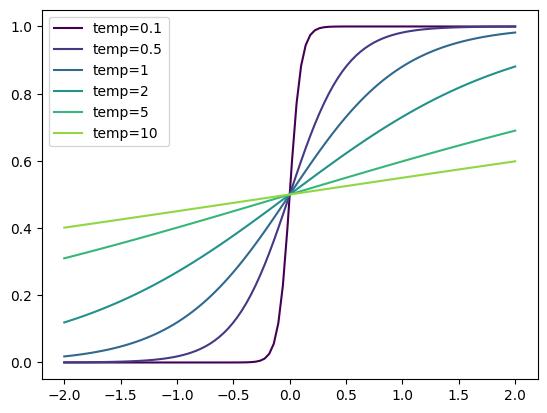

In [41]:
# Define temperatures
temperatures = [0.1, 0.5, 1, 2, 5, 10]

# Plot softmax functions for each temperature, using viridis colourmap
for i, temperature in enumerate(temperatures):
    plt.plot(
        test_values[:, 0],
        softmax(test_values, temperature)[:, 0],
        label=f"temp={temperature}",
        c=plt.cm.viridis(i / len(temperatures))
    )

# Add legend
plt.legend()


## Softmax function, subtracting the maximum value

In some applications we might have large values, which can cause numerical issues when computing the softmax function. To avoid this, we can subtract the maximum value from all values before computing the softmax function. This does not change the result, but can avoid these issues.

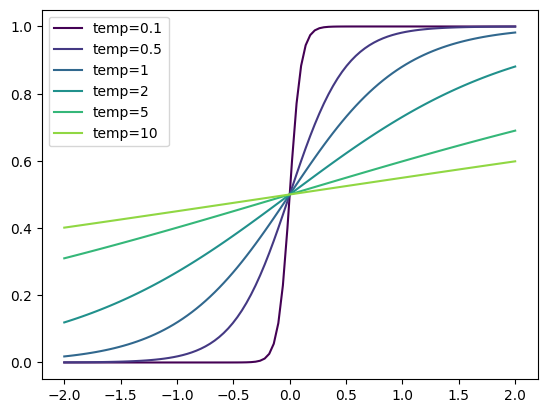

In [171]:
# Generate a range of values from -1 to 1 for a single trial
test_values = np.linspace(-2, 2, 100)[:, None]

# Add 1-value as a second option
test_values = np.hstack((test_values, (2 - (1 + test_values)) - 1))

# Define temperatures
temperatures = [0.1, 0.5, 1, 2, 5, 10]

# Plot softmax functions for each temperature, using viridis colourmap
for i, temperature in enumerate(temperatures):
    plt.plot(
        test_values[:, 0],
        softmax_subtract_max(test_values, temperature)[:, 0],
        label=f"temp={temperature}",
        c=plt.cm.viridis(i / len(temperatures))
    )

# Add legend
plt.legend()


Critically, this means it gives non-NaN results even when the values are large (although the results might look a bit strange).

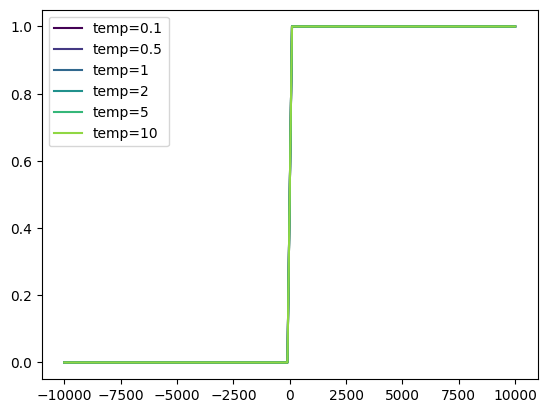

In [174]:
# Generate a range of values from -1 to 1 for a single trial
test_values = np.linspace(-9999, 9999, 100)[:, None]

# Add 1-value as a second option
test_values = np.hstack((test_values, (2 - (1 + test_values)) - 1))

# Define temperatures
temperatures = [0.1, 0.5, 1, 2, 5, 10]

# Plot softmax functions for each temperature, using viridis colourmap
for i, temperature in enumerate(temperatures):
    plt.plot(
        test_values[:, 0],
        softmax_subtract_max(test_values, temperature)[:, 0],
        label=f"temp={temperature}",
        c=plt.cm.viridis(i / len(temperatures))
    )

# Add legend
plt.legend()
